# Workboook
A compilation of all the exercises that appear in every chapter that I can use to drill

## Why do I need to drill once and again all these problems?
Well, mostly because of two reasons:
1. There will be a time in the future when I will find a complete new problem and then I might be able to say, oh, look, this problem is similar to that one I drilled while ago.
2. If I have in mind all these problems memorized, then I'm going to be able to tell better their differences and nuances.

**Don't bother too much with being right or wrong when drilling specially on first attempts.** The key is repetition and spot weaknesses.

# Chapter 02: Bayes Theorem 

## Coins In a Box
**Exercise:** Suppose you have two coins in a box.
One is a normal coin with heads on one side and tails on the other, and one is a trick coin with heads on both sides.  You choose a coin at random and see that one of the sides is heads.
What is the probability that you chose the trick coin?

In [149]:
# Solution goes here

## Both Children are Girls
**Exercise:** Suppose you meet someone and learn that they have two children.
You ask if either child is a girl and they say yes.
What is the probability that both children are girls?

Hint: Start with four equally likely hypotheses.

In [150]:
# Solution goes here

## Monty Hall Problem Variation
**Exercise:** There are many variations of the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem}).  
For example, suppose Monty always chooses Door 2 if he can, and
only chooses Door 3 if he has to (because the car is behind Door 2).

If you choose Door 1 and Monty opens Door 2, what is the probability the car is behind Door 3?

If you choose Door 1 and Monty opens Door 3, what is the probability the car is behind Door 2?

In [151]:
# Solution goes here

In [152]:
# Solution goes here

## M and Ms
**Exercise:** M&M's are small candy-coated chocolates that come in a variety of colors.  
Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M's.  

* In 1994, the color mix in a bag of plain M&M's was 30\% Brown, 20\% Yellow, 20\% Red, 10\% Green, 10\% Orange, 10\% Tan.  

* In 1996, it was 24\% Blue , 20\% Green, 16\% Orange, 14\% Yellow, 13\% Red, 13\% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me
that one is from 1994 and one from 1996.  He won't tell me which is
which, but he gives me one M&M from each bag.  One is yellow and
one is green.  What is the probability that the yellow one came
from the 1994 bag?

Hint: The trick to this question is to define the hypotheses and the data carefully.

In [153]:
# Solution goes here

# Chapter 03: Distributions

## Rolling Dice
Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7.
What is the probability that I chose the 8-sided die?

You can use the `update_dice` function or do the update yourself.

In [154]:
# Solution goes here

## Rolling Dice II
**Exercise:** In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die.
But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided.
I choose a die, roll it, and get a 7.
What is the probability that I chose an 8-sided die?

Hint: To make the prior distribution, call `Pmf` with two parameters.

In [155]:
# Solution goes here

## Sock Drawers
**Exercise:** Suppose I have two sock drawers.
One contains equal numbers of black and white socks.
The other contains equal numbers of red, green, and blue socks.
Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair.
What is the probability that the socks are white?

For simplicity, let's assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

In [156]:
# Solution goes here

In [157]:
# Solution goes here

## Elvis Twin
**Exercise:** Here's a problem from [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/):

> Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

In [158]:
# Solution goes here

In [159]:
# Solution goes here

In [160]:
# Solution goes here

# Chapter 04: estimating proportions

## Batting Average
**Exercise:** In Major League Baseball, most players have a batting average between 200 and 330, which means that their probability of getting a hit is between 0.2 and 0.33.

Suppose a player appearing in their first game gets 3 hits out of 3 attempts.  What is the posterior distribution for their probability of getting a hit?

For this exercise, I'll construct the prior distribution by starting with a uniform distribution and updating it with imaginary data until it has a shape that reflects my background knowledge of batting averages.

Here's the uniform prior:

In [161]:
import numpy as np
from empiricaldist import Pmf
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)

And here is a dictionary of likelihoods, with `Y` for getting a hit and `N` for not getting a hit.

In [162]:
likelihood = {
    'Y': hypos,
    'N': 1-hypos
}

Here's a dataset that yields a reasonable prior distribution.

In [163]:
dataset = 'Y' * 25 + 'N' * 75

And here's the update with the imaginary data.

In [164]:
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

1.3596964206970507e-23

Finally, here's what the prior looks like.

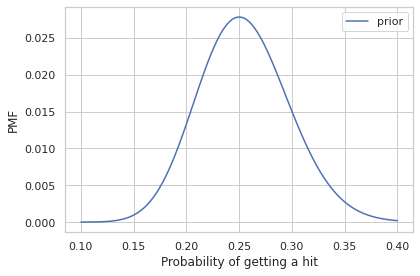

In [165]:
from my_exercices.utils import decorate

prior.plot(label='prior')
decorate(xlabel='Probability of getting a hit',
         ylabel='PMF')

This distribution indicates that most players have a batting average near 250, with only a few players below 175 or above 350.  I'm not sure how accurately this prior reflects the distribution of batting averages in Major League Baseball, but it is good enough for this exercise.

Now update this distribution with the data and plot the posterior.  What is the most likely quantity in the posterior distribution?

In [166]:
# Solution goes here

In [167]:
# Solution goes here

In [168]:
# Solution goes here

In [169]:
# Solution goes here

## Social Desirability Bias
**Exercise:** Whenever you survey people about sensitive issues, you have to deal with [social desirability bias](https://en.wikipedia.org/wiki/Social_desirability_bias), which is the tendency of people to adjust their answers to show themselves in the most positive light.
One way to improve the accuracy of the results is [randomized response](https://en.wikipedia.org/wiki/Randomized_response).

As an example, suppose want to know how many people cheat on their taxes.  
If you ask them directly, it is likely that some of the cheaters will lie.
You can get a more accurate estimate if you ask them indirectly, like this: Ask each person to flip a coin and, without revealing the outcome,

* If they get heads, they report YES.

* If they get tails, they honestly answer the question "Do you cheat on your taxes?"

If someone says YES, we don't know whether they actually cheat on their taxes; they might have flipped yes.
Knowing this, people might be more willing to answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs.  Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes?  What is the most likely quantity in the posterior distribution?

In [170]:
# Solution goes here

In [171]:
# Solution goes here

In [172]:
# Solution goes here

In [173]:
# Solution goes here

In [174]:
# Solution goes here

## Machine to Spot the Fairnes of a Coin
**Exercise:** Suppose you want to test whether a coin is fair, but you don't want to spin it hundreds of times.
So you make a machine that spins the coin automatically and uses computer vision to determine the outcome.

However, you discover that the machine is not always accurate.  Specifically, suppose the probability is `y=0.2` that an actual heads is reported as tails, or actual tails reported as heads.

If we spin a coin 250 times and the machine reports 140 heads, what is the posterior distribution of `x`?
What happens as you vary the value of `y`?

In [175]:
# Solution goes here

In [176]:
# Solution goes here

In [177]:
# Solution goes here

In [178]:
# Solution goes here

## Alien Invasion
**Exercise:** In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders.  Of course, some missile designs are better than others; let's assume that each design has some probability of hitting an alien ship, `x`.

Based on previous tests, the distribution of `x` in the population of designs is approximately uniform between 0.1 and 0.4.

Now suppose the new ultra-secret Alien Blaster 9000 is being tested.  In a press conference, an EDL general reports that the new design has been tested twice, taking two shots during each test.  The results of the test are confidential, so the general won't say how many targets were hit, but they report: "The same number of targets were hit in the two tests, so we have reason to think this new design is consistent."

Is this data good or bad; that is, does it increase or decrease your estimate of `x` for the Alien Blaster 9000?

Hint: If the probability of hitting each target is $x$, the probability of hitting one target in both tests
is $\left[2x(1-x)\right]^2$.

In [179]:
# Solution goes here

In [180]:
# Solution goes here

In [181]:
# Solution goes here

In [182]:
# Solution goes here

In [183]:
# Solution goes here

In [184]:
# Solution goes here

In [185]:
# Solution goes here

# Chapter 05: Estimating counts

## Audience Over Capacity
**Exercise:** Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room. 

You think there are fewer then 1200 people, and you offer to prove it.
It would take too long to count, so you try an experiment:

* You ask how many people were born on May 11 and two people raise their hands.  

* You ask how many were born on May 23 and 1 person raises their hand.  
* Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience?  What is the probability that there are more than 1200 people.
Hint: Remember the binomial distribution.

In [186]:
# Solution goes here

In [187]:
# Solution goes here

In [188]:
# Solution goes here

In [189]:
# Solution goes here

In [190]:
# Solution goes here

In [191]:
# Solution goes here

## Counting Rabbits
**Exercise:** I often see [rabbits](https://en.wikipedia.org/wiki/Eastern_cottontail) in the garden behind my house, but it's not easy to tell them apart, so I don't really know how many there are.

Suppose I deploy a motion-sensing [camera trap](https://en.wikipedia.org/wiki/Camera_trap) that takes a picture of the first rabbit it sees each day.  After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different.

How many rabbits visit my garden?

To answer this question, we have to think about the prior distribution and the likelihood of the data:

* I have sometimes seen four rabbits at the same time, so I know there are at least that many.  I would be surprised if there were more than 10.  So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.

* To keep things simple, let's assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day.  Let's also assume it is guaranteed that the camera trap gets a picture every day.

In [192]:
# Solution goes here

In [193]:
# Solution goes here

In [194]:
# Solution goes here

## Sentences Served
**Exercise:** Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each.  One day, you visit a prison and choose a prisoner at random.  What is the probability that they are serving a 3-year sentence?  What is the average remaining sentence of the prisoners you observe?

In [195]:
# Solution goes here

In [196]:
# Solution goes here

In [197]:
# Solution goes here

## Sibling Probability
**Exercise:** If I chose a random adult in the U.S., what is the probability that they have a sibling?  To be precise, what is the probability that their mother has had at least one other child.

[This article from the Pew Research Center](https://www.pewsocialtrends.org/2015/05/07/family-size-among-mothers/) provides some relevant data.  

From it, I extracted the following distribution of family size for mothers in the U.S. who were 40-44 years old in 2014:

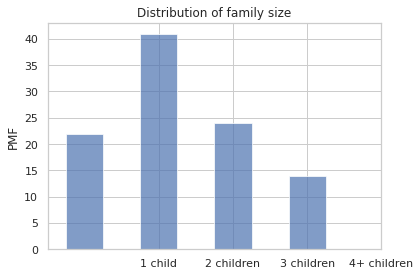

In [198]:
import matplotlib.pyplot as plt

qs = [1, 2, 3, 4]
ps = [22, 41, 24, 14]
prior = Pmf(ps, qs)
prior.bar(alpha=0.7)

plt.xticks(qs, ['1 child', '2 children', '3 children', '4+ children'])
decorate(ylabel='PMF',
         title='Distribution of family size')

For simplicity, let's assume that all families in the 4+ category have exactly 4 children.

In [199]:
# Solution goes here

In [200]:
# Solution goes here

In [201]:
# Solution goes here

## Doomsday argument
**Exercise:** The [Doomsday argument](https://en.wikipedia.org/wiki/Doomsday_argument) is "a probabilistic argument that claims to predict the number of future members of the human species given an estimate of the total number of humans born so far."

Suppose there are only two kinds of intelligent civilizations that can happen in the universe.  The "short-lived" kind go exinct after only 200 billion individuals are born.  The "long-lived" kind survive until 2,000 billion individuals are born.
And suppose that the two kinds of civilization are equally likely.
Which kind of civilization do you think we live in?  

The Doomsday argument says we can use the total number of humans born so far as data.
According to the [Population Reference Bureau](https://www.prb.org/howmanypeoplehaveeverlivedonearth/), the total number of people who have ever lived is about 108 billion.

Since you were born quite recently, let's assume that you are, in fact, human being number 108 billion.
If $N$ is the total number who will ever live and we consider you to be a randomly-chosen person, it is equally likely that you could have been person 1, or $N$, or any number in between.
So what is the probability that you would be number 108 billion?

Given this data and dubious prior, what is the probability that our civilization will be short-lived?

In [202]:
# Solution goes here

In [203]:
# Solution goes here

In [204]:
# Solution goes here

# Chapter 06: Odds and Addends
## Elvis Twin II
**Exercise:** Let's use Bayes's Rule to solve the Elvis problem from <<_Distributions>>:

> Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin?

In 1935, about 2/3 of twins were fraternal and 1/3 were identical.
The question contains two pieces of information we can use to update this prior.

* First, Elvis's twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2.

* Also, Elvis's twin died at birth, which is more likely if they were identical twins, with a likelihood ratio of 1.25.

If you are curious about where those numbers come from, I wrote [a blog post about it](https://www.allendowney.com/blog/2020/01/28/the-elvis-problem-revisited).

In [205]:
# Solution goes here

In [206]:
# Solution goes here

In [207]:
# Solution goes here

## Weather in Seattle
**Exercise:** The following is an [interview question that appeared on glassdoor.com](https://www.glassdoor.com/Interview/You-re-about-to-get-on-a-plane-to-Seattle-You-want-to-know-if-you-should-bring-an-umbrella-You-call-3-random-friends-of-y-QTN_519262.htm), attributed to Facebook:

> You're about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?

Use Bayes's Rule to solve this problem.  As a prior you can assume that it rains in Seattle about 10% of the time.

This question causes some confusion about the differences between Bayesian and frequentist interpretations of probability; if you are curious about this point, [I wrote a blog article about it](http://allendowney.blogspot.com/2016/09/bayess-theorem-is-not-optional.html).

In [208]:
# Solution goes here

In [209]:
# Solution goes here

In [210]:
# Solution goes here

## Lung Cancer
**Exercise:** [According to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking), people who smoke are about 25 times more likely to develop lung cancer than nonsmokers.

[Also according to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm), about 14\% of adults in the U.S. are smokers.
If you learn that someone has lung cancer, what is the probability they are a smoker?

In [211]:
# Solution goes here

In [212]:
# Solution goes here

In [213]:
# Solution goes here

## Goblins
**Exercise:** In *Dungeons & Dragons*, the amount of damage a goblin can withstand is the sum of two six-sided dice. The amount of damage you inflict with a short sword is determined by rolling one six-sided die.
A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack?

Hint: You can use `Pmf.add_dist` to add a constant amount, like 3, to a `Pmf` and `Pmf.sub_dist` to compute the distribution of remaining points.

In [214]:
# Solution goes here

In [215]:
# Solution goes here

In [216]:
# Solution goes here

In [217]:
# Solution goes here

In [218]:
# Solution goes here

In [219]:
# Solution goes here

## Dice Value Multiplication
**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it twice, multiply the outcomes, and report that the product is 12.
What is the probability that I chose the 8-sided die?

Hint: `Pmf` provides a function called `mul_dist` that takes two `Pmf` objects and returns a `Pmf` that represents the distribution of the product.

In [220]:
# Solution goes here

In [221]:
# Solution goes here

In [222]:
# Solution goes here

In [223]:
# Solution goes here

## Betrayal at House on the Hill
**Exercise:** *Betrayal at House on the Hill* is a strategy game in which characters with different attributes explore a haunted house.  Depending on their attributes, the characters roll different numbers of dice.  For example, if attempting a task that depends on knowledge, Professor Longfellow rolls 5 dice, Madame Zostra rolls 4, and Ox Bellows rolls 3.  Each die yields 0, 1, or 2 with equal probability.  

If a randomly chosen character attempts a task three times and rolls a total of 3 on the first attempt, 4 on the second, and 5 on the third, which character do you think it was?

In [224]:
# Solution goes here

In [225]:
# Solution goes here

In [226]:
# Solution goes here

In [227]:
# Solution goes here

In [228]:
# Solution goes here

In [229]:
# Solution goes here

In [230]:
# Solution goes here

## US Congress
**Exercise:** There are 538 members of the United States Congress.  
Suppose we audit their investment portfolios and find that 312 of them out-perform the market.
Let's assume that an honest member of Congress has only a 50% chance of out-performing the market, but a dishonest member who trades on inside information has a 90% chance.  How many members of Congress are honest?

In [231]:
# Solution goes here

In [232]:
# Solution goes here

In [233]:
# Solution goes here

In [234]:
# Solution goes here

In [235]:
# Solution goes here

In [236]:
# Solution goes here

In [237]:
# Solution goes here

# Chapter 07: Minimum, Maximum and Mixture
## DD Standard Array
**Exercise:** When you generate a D&D character, instead of rolling dice, you can use the "standard array" of attributes, which is 15, 14, 13, 12, 10, and 8.
Do you think you are better off using the standard array or (literally) rolling the dice?

Compare the distribution of the values in the standard array to the distribution we computed for the best three out of four:

* Which distribution has higher mean?  Use the `mean` method.

* Which distribution has higher standard deviation?  Use the `std` method.

* The lowest value in the standard array is 8.  For each attribute, what is the probability of getting a value less than 8?  If you roll the dice six times, what's the probability that at least one of your attributes is less than 8?

* The highest value in the standard array is 15.  For each attribute, what is the probability of getting a value greater than 15?  If you roll the dice six times, what's the probability that at least one of your attributes is greater than 15?

To get you started, here's a `Cdf` that represents the distribution of attributes in the standard array:

In [238]:
from empiricaldist import Cdf

standard = [15, 14,13,12,10,8]
cdf_standard = Cdf.from_seq(standard)

We can compare it to the distribution of attributes you get by rolling four dice at adding up the best three.

In [239]:
# cdf_best3.plot(label='best 3 of 4', color='C1', style='--')
# cdf_standard.step(label='standard set', color='C7')
#
# decorate_dice('Distribution of attributes')
# plt.ylabel('CDF');

I plotted `cdf_standard` as a step function to show more clearly that it contains only a few quantities.

In [240]:
# Solution goes here

In [241]:
# Solution goes here

In [242]:
# Solution goes here

In [243]:
# Solution goes here

In [244]:
# Solution goes here

In [245]:
# Solution goes here

## More D&D
**Exercise:** Suppose you are fighting three monsters:

* One is armed with a short sword that causes one 6-sided die of damage,

* One is armed with a battle axe that causes one 8-sided die of damage, and

* One is armed with a bastard sword that causes one 10-sided die of damage.

One of the monsters, chosen at random, attacks you and does 1 point of damage.

Which monster do you think it was?  Compute the posterior probability that each monster was the attacker.

If the same monster attacks you again, what is the probability that you suffer 6 points of damage?

Hint: Compute a posterior distribution as we have done before and pass it as one of the arguments to `make_mixture`.

In [246]:
# Solution goes here

In [247]:
# Solution goes here

In [248]:
# Solution goes here

In [249]:
# Solution goes here

## Henri Poincaré Bread
**Exercise:** Henri Poincaré was a French mathematician who taught at the Sorbonne around 1900. The following anecdote about him is probably fiction, but it makes an interesting probability problem.

Supposedly Poincaré suspected that his local bakery was selling loaves of bread that were lighter than the advertised weight of 1 kg, so every day for a year he bought a loaf of bread, brought it home and weighed it. At the end of the year, he plotted the distribution of his measurements and showed that it fit a normal distribution with mean 950 g and standard deviation 50 g. He brought this evidence to the bread police, who gave the baker a warning.

For the next year, Poincaré continued to weigh his bread every day. At the end of the year, he found that the average weight was 1000 g, just as it should be, but again he complained to the bread police, and this time they fined the baker.

Why? Because the shape of the new distribution was asymmetric. Unlike the normal distribution, it was skewed to the right, which is consistent with the hypothesis that the baker was still making 950 g loaves, but deliberately giving Poincaré the heavier ones.

To see whether this anecdote is plausible, let's suppose that when the baker sees Poincaré coming, he hefts `n` loaves of bread and gives Poincaré the heaviest one.  How many loaves would the baker have to heft to make the average of the maximum 1000 g?

To get you started, I'll generate a year's worth of data from a normal distribution with the given parameters.

In [250]:
mean = 950
std = 50

np.random.seed(17)
sample = np.random.normal(mean, std, size=365)

In [251]:
# Solution goes here

In [252]:
# Solution goes here

# Chapter 08: Poisson Processes
## Scoring More Than 5 Goals
**Exercise:** Let's finish the exercise we started:

>In the 2014 FIFA World Cup, Germany played Brazil in a semifinal match. Germany scored after 11 minutes and again at the 23 minute mark. At that point in the match, how many goals would you expect Germany to score after 90 minutes? What was the probability that they would score 5 more goals (as, in fact, they did)?

Here are the steps I recommend:

1. Starting with the same gamma prior we used in the previous problem, compute the likelihood of scoring a goal after 11 minutes for each possible value of `lam`.  Don't forget to convert all times into games rather than minutes.

2. Compute the posterior distribution of `lam` for Germany after the first goal.

3. Compute the likelihood of scoring another goal after 12 more minutes and do another update.  Plot the prior, posterior after one goal, and posterior after two goals.

4. Compute the posterior predictive distribution of goals Germany might score during the remaining time in the game, `90-23` minutes.  Note: you will have to think about how to generate predicted goals for a fraction of a game.

5. Compute the probability of scoring 5 or more goals during the remaining time.

In [253]:
# Solution goes here

In [254]:
# Solution goes here

In [255]:
# Solution goes here

In [256]:
# Solution goes here

In [257]:
# Solution goes here

In [258]:
# Solution goes here

In [259]:
# Solution goes here

In [260]:
# Solution goes here

In [261]:
# Solution goes here

## France Scoring First
**Exercise:** Returning to the first version of the World Cup Problem.  Suppose France and Croatia play a rematch.  What is the probability that France scores first?

Hint: Compute the posterior predictive distribution for the time until the first goal by making a mixture of exponential distributions.  You can use the following function to make a PMF that approximates an exponential distribution.

In [262]:
def make_expo_pmf(lam, high):
    """Make a PMF of an exponential distribution.
    
    lam: event rate
    high: upper bound on the interval `t`
    
    returns: Pmf of the interval between events
    """
    qs = np.linspace(0, high, 101)
    ps = expo_pdf(qs, lam)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

In [263]:
# Solution goes here

In [264]:
# Solution goes here

In [265]:
# Solution goes here

In [266]:
# Solution goes here

**Exercise:** In the 2010-11 National Hockey League (NHL) Finals, my beloved Boston
Bruins played a best-of-seven championship series against the despised
Vancouver Canucks.  Boston lost the first two games 0-1 and 2-3, then
won the next two games 8-1 and 4-0.  At this point in the series, what
is the probability that Boston will win the next game, and what is
their probability of winning the championship?

To choose a prior distribution, I got some statistics from
http://www.nhl.com, specifically the average goals per game
for each team in the 2010-11 season.  The distribution is well modeled by a gamma distribution with mean 2.8.

In what ways do you think the outcome of these games might violate the assumptions of the Poisson model?  How would these violations affect your predictions?

***
https://en.wikipedia.org/wiki/2011_Stanley_Cup_playoffs#Stanley_Cup_Finals

Spoiler, the next three matches were:
* 0 - 1 for Vancouver  
* 5 - 2 for Boston  
* 4 - 0 for Boston

# Decision Analysis
**Exercise:** When I worked in Cambridge, Massachusetts, I usually took the subway to South Station and the a commuter train home to Needham.  Because the subway was unpredictable, I left the office early enough that I could wait up to 15 minutes and still catch my train.

When I got to the subway stop, there were usually about 10 people already waiting on the platform. If there were fewer than that, I figured I just missed a train, so I expected to wait a little longer than usual.  And if there there more than that, I expected another train soon.

But if there were a *lot* more than 10 passengers waiting, I inferred that something was wrong, and I expected a long wait.  In that case, I might leave and take a taxi.

We can use Bayesian decision analysis to quantify the analysis I did intuitively.  Given the number of passengers on the platform, how long should we expect to wait?  And when should we give up and take a taxi?

My analysis of this problem is in `redline.ipynb`, which is in the repository for this book.  [Click here to run this notebook on Colab]().

To gather data on the time between trains, I wrote a script that downloads real-time data from the [MBTA](http://www.mbta.com/rider_tools/developers/), selects south-bound trains arriving at Kendall square, and records their arrival times in a database. I ran the script from 4 pm to 6 pm every weekday for 5 days, and recorded about 15 arrivals per day. Then I computed the time between consecutive arrivals.
Here are the gap times I recorded, in seconds.

In [267]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
sns.set_theme(style="whitegrid")

In [19]:
# Given that we have a few samples of time gaps lets build our prior belief out of that
# data
observed_gap_times = [
    428.0, 705.0, 407.0, 465.0, 433.0, 425.0, 204.0, 506.0, 143.0, 351.0,
    450.0, 598.0, 464.0, 749.0, 341.0, 586.0, 754.0, 256.0, 378.0, 435.0,
    176.0, 405.0, 360.0, 519.0, 648.0, 374.0, 483.0, 537.0, 578.0, 534.0,
    577.0, 619.0, 538.0, 331.0, 186.0, 629.0, 193.0, 360.0, 660.0, 484.0,
    512.0, 315.0, 457.0, 404.0, 740.0, 388.0, 357.0, 485.0, 567.0, 160.0,
    428.0, 387.0, 901.0, 187.0, 622.0, 616.0, 585.0, 474.0, 442.0, 499.0,
    437.0, 620.0, 351.0, 286.0, 373.0, 232.0, 393.0, 745.0, 636.0, 758.0,
]
